In [1]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ta
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from Utils import utils

warnings.filterwarnings('ignore')

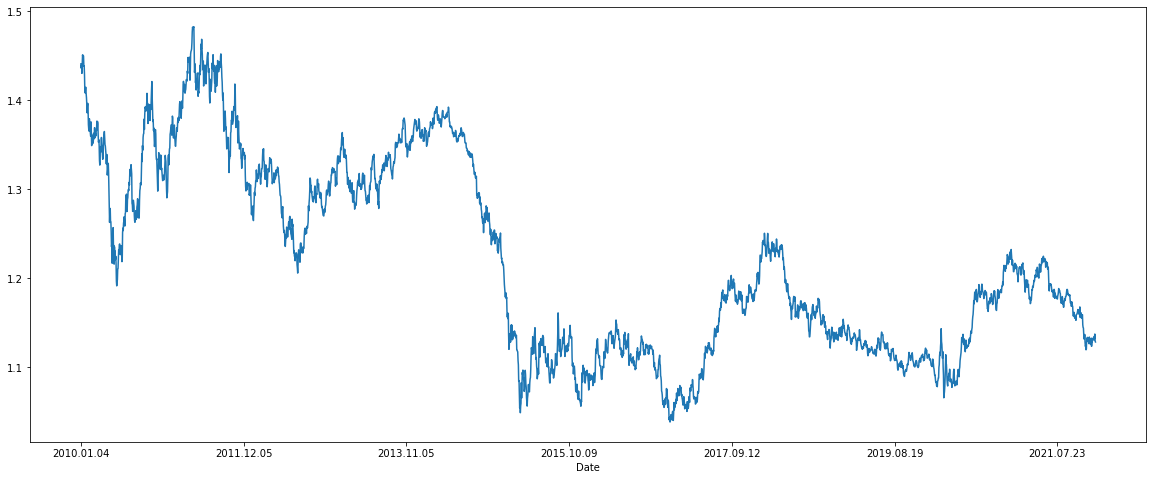

,Open,High,Low,Close,Volume,Median
Date,,,,,,
2010.01.04,1.43259,1.44543,1.42569,1.44111,45505,1.435560
2010.01.05,1.44107,1.44830,1.43467,1.43624,46686,1.441485
2010.01.06,1.43632,1.44338,1.42831,1.43998,45435,1.435845
2010.01.07,1.44001,1.44456,1.42994,1.43041,44298,1.437250
2010.01.08,1.43039,1.44263,1.42634,1.44085,34425,1.434485
...,...,...,...,...,...,...
2021.12.29,1.13079,1.13687,1.12732,1.13477,51231,1.132095
2021.12.30,1.13445,1.13599,1.12988,1.13256,50314,1.132935
2021.12.31,1.13244,1.13861,1.13033,1.13755,39263,1.134470


In [2]:
folder, ticker, period, startdatetime, enddatetime = 'CSVData', 'EURUSD', 'Daily', '201001040000', '202201040000'
multiplier = 100 if 'JPY' in ticker else 10000
ohlcv = pd.read_csv(folder+'/'+ticker+'_'+period+'_'+startdatetime+'_'+enddatetime+'.csv', delimiter='\t')
ohlcv = utils.prep_metatrader_data(ohlcv)
pyplot.figure(figsize=(20,8))
ohlcv['Close'].plot()
pyplot.show()
ohlcv

In [27]:
ohlcv['Direction'] = ohlcv['Close'] > ohlcv['Open']
ohlcv

,Open,High,Low,Close,Volume,Median,Direction
Date,,,,,,,
2010.01.04,1.43259,1.44543,1.42569,1.44111,45505,1.435560,True
2010.01.05,1.44107,1.44830,1.43467,1.43624,46686,1.441485,False
2010.01.06,1.43632,1.44338,1.42831,1.43998,45435,1.435845,True
2010.01.07,1.44001,1.44456,1.42994,1.43041,44298,1.437250,False
2010.01.08,1.43039,1.44263,1.42634,1.44085,34425,1.434485,True
2010.01.11,1.44125,1.45545,1.44121,1.45120,45827,1.448330,True
2010.01.12,1.45128,1.45448,1.44537,1.44920,46203,1.449925,False
2010.01.13,1.44918,1.45785,1.44561,1.45052,46521,1.451730,True
2010.01.14,1.45105,1.45547,1.44478,1.44978,44172,1.450125,False


In [135]:
label = 'Direction'
n = 8
X = utils.timeseries_df(ohlcv, label, n)
y = ohlcv[[label]].iloc[n:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
clf = RandomForestClassifier(n_estimators=500, max_depth=10)
#clf = MLPClassifier(hidden_layer_sizes=[500, 200], max_iter=1000, n_iter_no_change=500, verbose=False)
clf.fit(X_train, y_train.to_numpy().ravel())
predicted = clf.predict(X_test)
diff = predicted == y_test[label]
diff_df = pd.DataFrame({'Actual': y_test[label], 
                        'Predicted': predicted,
                        'Difference': diff})
sum(diff_df['Difference'])/len(diff_df)

0.5353697749196141

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
clf = RandomForestClassifier(n_estimators=500, max_depth=10)
#clf = MLPClassifier(hidden_layer_sizes=[500, 200], max_iter=1000, n_iter_no_change=500, verbose=False)
clf.fit(X_train, y_train.to_numpy().ravel())
predicted_prob = clf.predict_proba(X_test)
predicted = clf.predict(X_test)
#diff = predicted == y_test[label]
diff_df = pd.DataFrame({'Actual': y_test[label],
                        'Predicted': predicted,
                        'PredictedProb': np.max(predicted_prob, axis=1),
                        'Outcome' : predicted == y_test[label]
                       })
diff_df
threshold = .5
diff_df = diff_df[diff_df['PredictedProb'] >= threshold]
diff_df

if len(diff_df) > 0:
    print(sum(diff_df['Outcome'])/len(diff_df), len(diff_df))

0.5321543408360129 622


In [26]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
#regr = MLPRegressor(hidden_layer_sizes=[500, 200], 
#                    max_iter=1000, n_iter_no_change=500, verbose=False)

#regr = HistGradientBoostingRegressor(max_iter=1000, loss='absolute_error')

regr = LinearRegression()

regr.fit(X_train, y_train.to_numpy().ravel())

predicted = regr.predict(X_test)

diff = predicted - y_test[label]
diff_df = pd.DataFrame({'Actual': y_test[label], 
                        'Predicted': predicted,
                        'Difference': diff})

mae = mean_absolute_error(predicted, y_test)
ohlcv_test = ohlcv[ohlcv.index.isin(X_test.index)]
ach = sum(abs(ohlcv_test['High']-ohlcv_test['Low']))/len(diff)
print('Mean absolute error: ' + str(round(mae*multiplier,2)) + ' pips')
print('Average candle range: ' + str(round(ach*multiplier,2)) + ' pips')

Mean absolute error: 34.63 pips
Average candle range: 69.48 pips


In [21]:
y_pred = pd.DataFrame(index = ohlcv_test.index)
y_pred['y_pred'] = predicted
y_pred['low'], y_pred['high'] = ohlcv_test['Low'], ohlcv_test['High']
y_pred['open'], y_pred['close'] = ohlcv_test['Open'], ohlcv_test['Close'] 
y_pred

,y_pred,low,high,open,close
Date,,,,,
2019.06.28,1.135120,1.13501,1.13931,1.13688,1.13693
2019.07.01,1.135323,1.12806,1.13707,1.13670,1.12851
2019.07.02,1.127071,1.12748,1.13212,1.12850,1.12857
2019.07.03,1.127991,1.12682,1.13111,1.12847,1.12774
2019.07.04,1.127042,1.12727,1.12947,1.12777,1.12847
2019.07.05,1.127434,1.12070,1.12874,1.12837,1.12248
2019.07.08,1.119639,1.12069,1.12343,1.12240,1.12142
2019.07.09,1.121134,1.11932,1.12187,1.12141,1.12078
2019.07.10,1.119309,1.12018,1.12642,1.12076,1.12503


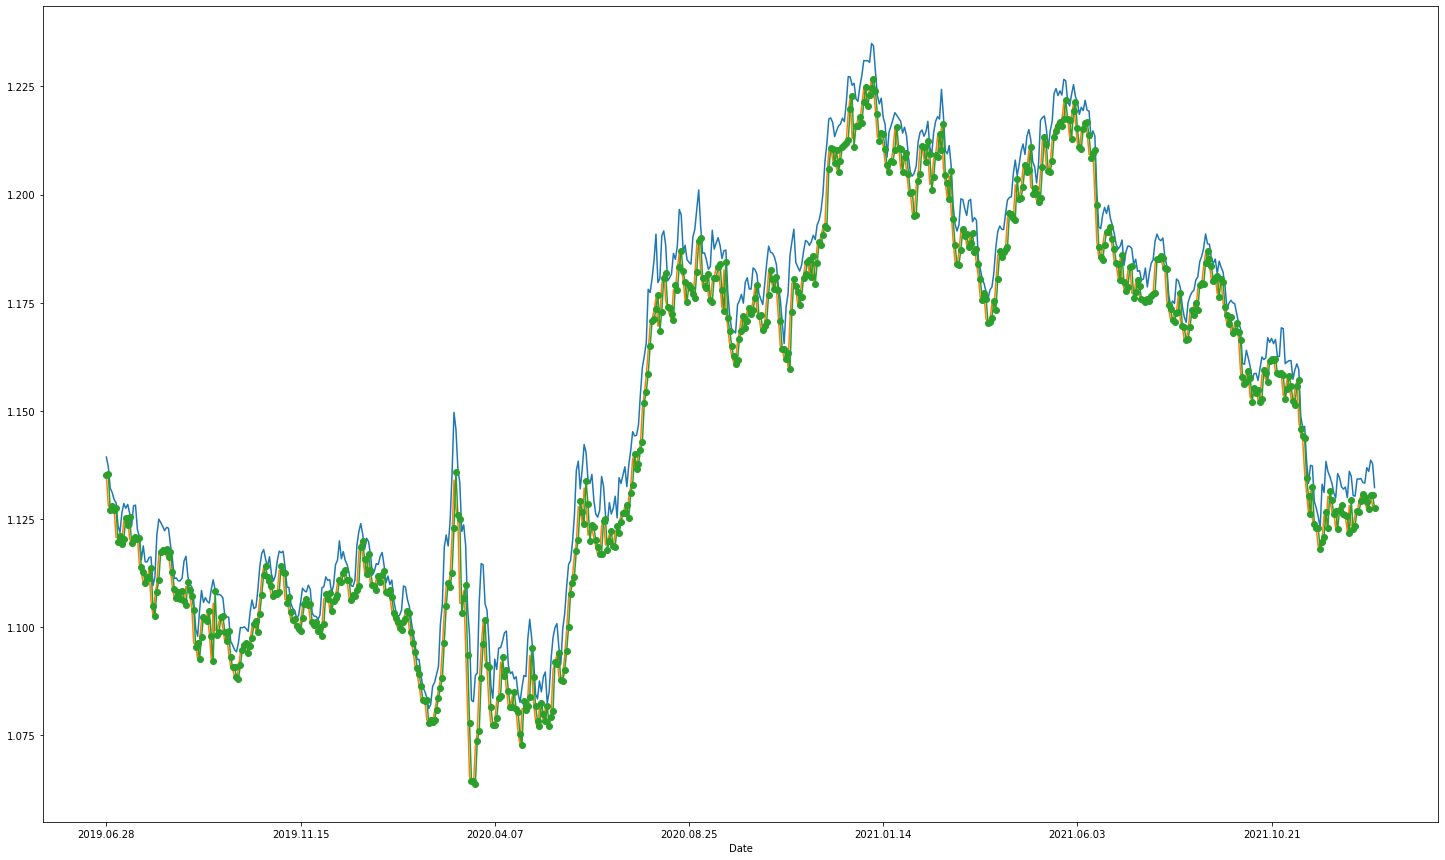

Hitrate: 50.61%
Number of candles: 654


In [22]:
y_pred, hitrate = utils.get_hitrate(y_pred)
pyplot.figure(figsize=(25,15))
y_pred['high'].plot()
y_pred['low'].plot()
y_pred['y_pred'].plot(marker = 'o')
pyplot.show()
print('Hitrate: ' + str(round(hitrate*100,2)) + '%')
print('Number of candles: ' + str(len(y_pred)))

In [23]:
y_pred, direction = utils.get_direction(y_pred)
y_pred, OR = utils.get_OR(y_pred)
y_pred, pips = utils.get_pips(y_pred, multiplier)
print('Direction: ' + str(round(direction*100,2)) + '%')
print('OR: ' + str(round(OR*100,2)) + '%')
print('Total pips: ' + str(round(pips,2)))

Direction: 50.61%
OR: 65.14%
Total pips: -145.8


In [24]:
sum(y_pred[y_pred['pips']>=0]['pips'])

8692.100120811634

In [18]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
y_pred

,y_pred,low,high,open,close,hit,direction,OR,pips
Date,,,,,,,,,
2019.06.28,1.138244,1.13501,1.13931,1.13688,1.13693,True,True,True,13.640547
2019.07.01,1.139618,1.12806,1.13707,1.13670,1.12851,False,False,False,-81.900000
2019.07.02,1.136830,1.12748,1.13212,1.12850,1.12857,False,True,True,0.700000
2019.07.03,1.131656,1.12682,1.13111,1.12847,1.12774,False,False,False,-7.300000
2019.07.04,1.131304,1.12727,1.12947,1.12777,1.12847,False,True,True,7.000000
2019.07.05,1.129606,1.12070,1.12874,1.12837,1.12248,False,False,False,-58.900000
2019.07.08,1.128845,1.12069,1.12343,1.12240,1.12142,False,False,False,-9.800000
2019.07.09,1.122967,1.11932,1.12187,1.12141,1.12078,False,False,False,-6.300000
2019.07.10,1.121983,1.12018,1.12642,1.12076,1.12503,True,True,True,12.227242
